# EVALUATION OF VALUE-AT-RISK(VAR) METHODOLOGIES FOR STOCKS, BONDS, FOREX AND COMMODITY
Authors: Adelowotan Abayomi and Ayinde Sunday Kabiru
yomisys@gmail.com and ayindeks@yahoo.com

KEY ASSUMPTIONS:
Normality of data distributions
Risk-free=0 for Bonds 

In [2]:
# IMPORTING PYTHON DEPENDENCIES 
import pandas as pd
import numpy as np
import datetime
import math
# Statitsical Calculation
from scipy import stats
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew, kurtosis, kurtosistest
from scipy.stats import norm, t
# File Directory
import os
#Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
np.warnings.filterwarnings('ignore')
import seaborn as sns
seaborn.mpl.rcParams['figure.figsize'] = (12.0,8.0)
# Tabular Data Output
from tabulate import tabulate
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from dateutil.relativedelta import relativedelta
pd.options.display.float_format = '{:20,.3f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
matplotlib.style.use('ggplot')
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from dateutil.relativedelta import relativedelta
pd.options.display.float_format = '{:20,.3f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
#data = pd.read_csv("/Users/USER/Desktop/VaR_Data.csv")
os.getcwd()

'C:\\Users\\HP\\Downloads'

In [4]:
data = pd.read_csv("/Users/HP/Desktop/VaR_Data.csv",parse_dates=['Dates'], index_col='Dates')

In [5]:
data.head()

,JPY Curncy,GBP Curncy,NGN Curncy,NGSEINDX Index,SPX Index,SX5E Index,CO1 Comdty,GC1 Comdty,C 1 Comdty,LF98TRUU Index,EMBIV Index,LP06TREU Index
Dates,,,,,,,,,,,,
2009-01-02,91.840,1.455,139.700,"31,357.240",931.800,"2,536.470",46.910,879.500,412.250,669.240,83.353,149.197
2009-01-05,93.440,1.470,136.550,"30,816.230",927.450,"2,553.410",49.620,857.800,411.250,681.690,83.260,149.537
2009-01-06,93.650,1.492,136.550,"30,000.750",934.700,"2,578.430",50.530,866.000,427.500,701.250,84.433,149.234
2009-01-07,92.650,1.510,136.550,"29,176.800",906.650,"2,538.550",45.860,841.700,416.500,709.970,85.176,149.384
2009-01-08,91.210,1.522,144.130,"28,690.800",909.730,"2,516.560",44.670,854.500,406.750,705.690,85.697,149.927


In [6]:
data_fx = data[['JPY Curncy','GBP Curncy','NGN Curncy']].iloc[-1]

In [7]:
data_stock = data[['NGSEINDX Index','SPX Index','SX5E Index']].iloc[-1]

In [8]:
data_commodity = data [['CO1 Comdty','GC1 Comdty','C 1 Comdty']].iloc[-1]

In [9]:
data_bond = data[['LF98TRUU Index','EMBIV Index','LP06TREU Index']].iloc[-1]

In [10]:
data.describe()

,JPY Curncy,GBP Curncy,NGN Curncy,NGSEINDX Index,SPX Index,SX5E Index,CO1 Comdty,GC1 Comdty,C 1 Comdty,LF98TRUU Index,EMBIV Index,LP06TREU Index
count,"2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000","2,732.000"
mean,100.171,1.493,216.151,"29,707.529","1,812.991","2,975.615",79.260,"1,305.122",459.480,"1,521.636",109.502,201.281
std,13.857,0.135,83.110,"6,490.134",592.985,417.079,25.645,204.814,139.182,342.618,7.271,28.295
min,75.820,1.205,136.550,"19,732.340",676.530,"1,809.980",27.880,807.300,300.500,655.900,80.057,146.607
25%,88.820,1.352,156.250,"24,773.520","1,293.745","2,698.270",56.008,"1,197.100",361.500,"1,263.078",106.996,172.397
50%,101.975,1.538,162.500,"28,152.035","1,861.540","2,998.500",75.180,"1,275.150",384.000,"1,578.130",110.045,201.881
75%,111.453,1.601,314.863,"35,005.457","2,184.485","3,312.743",107.380,"1,366.725",568.875,"1,788.900",113.987,228.690
max,125.630,1.717,367.500,"45,092.830","2,954.180","3,828.780",126.650,"1,888.700",831.250,"2,099.990",122.899,242.943


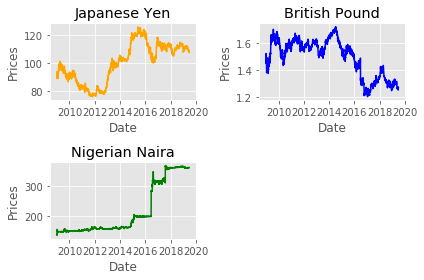

In [11]:
# DATA VISUALIZATION OF FOREX PRICE
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.plot(data['JPY Curncy'],color ='orange')
ax1.set_title("Japanese Yen")
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
ax2.plot(data['GBP Curncy'], color='blue')
ax2.set_title('British Pound')
ax2.set_xlabel('Date')
ax2.set_ylabel('Prices')
ax3.plot(data['NGN Curncy'], color='green')
ax3.set_title('Nigerian Naira')
ax3.set_xlabel('Date')
ax3.set_ylabel('Prices')
plt.tight_layout()
plt.show()


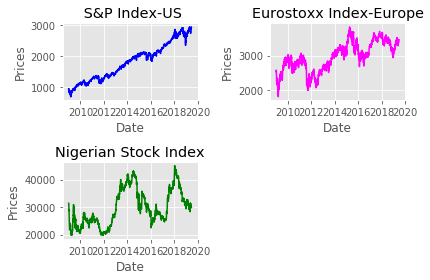

In [12]:
# DATA VISUALIZATION OF STOCK PRICES
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.plot(data['SPX Index'],color ='blue')
ax1.set_title(" S&P Index-US")
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
ax2.plot(data['SX5E Index'], color='magenta')
ax2.set_title('Eurostoxx Index-Europe')
ax2.set_xlabel('Date')
ax2.set_ylabel('Prices')
ax3.plot(data['NGSEINDX Index'], color='green')
ax3.set_title('Nigerian Stock Index')
ax3.set_xlabel('Date')
ax3.set_ylabel('Prices')
plt.tight_layout()
plt.show()

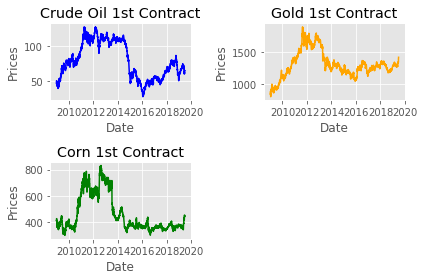

In [13]:
# DATA VISUALIZATION OF COMMODITY PRICES
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.plot(data['CO1 Comdty'],color ='blue')
ax1.set_title('Crude Oil 1st Contract')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
ax2.plot(data['GC1 Comdty'], color='orange')
ax2.set_title('Gold 1st Contract')
ax2.set_xlabel('Date')
ax2.set_ylabel('Prices')
ax3.plot(data['C 1 Comdty'], color='green')
ax3.set_title('Corn 1st Contract')
ax3.set_xlabel('Date')
ax3.set_ylabel('Prices')
plt.tight_layout()
plt.show()

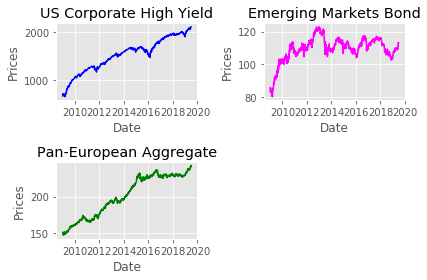

In [14]:
# DATA VISUALIZATION OF BONDS
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.plot(data['LF98TRUU Index'],color ='blue')
ax1.set_title('US Corporate High Yield')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
ax2.plot(data['EMBIV Index'], color='magenta')
ax2.set_title('Emerging Markets Bond')
ax2.set_xlabel('Date')
ax2.set_ylabel('Prices')
ax3.plot(data['LP06TREU Index'], color='green')
ax3.set_title('Pan-European Aggregate')
ax3.set_xlabel('Date')
ax3.set_ylabel('Prices')
plt.tight_layout()
plt.show()

In [15]:
# Calculating Asset Returns using pct_change
dataReturns = data.pct_change()
dataReturns.dropna(inplace=True)
dataReturns.head()

,JPY Curncy,GBP Curncy,NGN Curncy,NGSEINDX Index,SPX Index,SX5E Index,CO1 Comdty,GC1 Comdty,C 1 Comdty,LF98TRUU Index,EMBIV Index,LP06TREU Index
Dates,,,,,,,,,,,,
2009-01-05,0.017,0.010,-0.023,-0.017,-0.005,0.007,0.058,-0.025,-0.002,0.019,-0.001,0.002
2009-01-06,0.002,0.015,0.000,-0.026,0.008,0.010,0.018,0.010,0.040,0.029,0.014,-0.002
2009-01-07,-0.011,0.012,0.000,-0.027,-0.030,-0.015,-0.092,-0.028,-0.026,0.012,0.009,0.001
2009-01-08,-0.016,0.008,0.056,-0.017,0.003,-0.009,-0.026,0.015,-0.023,-0.006,0.006,0.004
2009-01-09,-0.009,-0.003,0.014,0.006,-0.021,-0.012,-0.006,0.001,0.010,0.005,-0.006,0.007


In [16]:
# Converting Asset Returns to Percentage
data_retpercent = dataReturns * 100
data_retpercent= data_retpercent.dropna()
data_retpercent.head()

,JPY Curncy,GBP Curncy,NGN Curncy,NGSEINDX Index,SPX Index,SX5E Index,CO1 Comdty,GC1 Comdty,C 1 Comdty,LF98TRUU Index,EMBIV Index,LP06TREU Index
Dates,,,,,,,,,,,,
2009-01-05,1.742,1.045,-2.255,-1.725,-0.467,0.668,5.777,-2.467,-0.243,1.860,-0.112,0.228
2009-01-06,0.225,1.476,0.000,-2.646,0.782,0.980,1.834,0.956,3.951,2.869,1.409,-0.202
2009-01-07,-1.068,1.193,0.000,-2.746,-3.001,-1.547,-9.242,-2.806,-2.573,1.243,0.880,0.100
2009-01-08,-1.554,0.802,5.551,-1.666,0.340,-0.866,-2.595,1.521,-2.341,-0.603,0.612,0.364
2009-01-09,-0.888,-0.342,1.402,0.613,-2.130,-1.191,-0.560,0.059,0.983,0.455,-0.642,0.656


In [17]:
# EXRACTING FOREX RETURN AND REMOVAL OF NULL -NGN,YEN and GBP
df_fx_ret = data_retpercent[['JPY Curncy','GBP Curncy','NGN Curncy']]

In [18]:
df_fx_ret.head()

,JPY Curncy,GBP Curncy,NGN Curncy
Dates,,,
2009-01-05,1.742,1.045,-2.255
2009-01-06,0.225,1.476,0.000
2009-01-07,-1.068,1.193,0.000
2009-01-08,-1.554,0.802,5.551
2009-01-09,-0.888,-0.342,1.402


In [19]:
# EXRACTING STOCK RETURN AND REMOVAL OF NULL -NGSE,SPX and EUROPEAN STOCK
df_stock_ret = data_retpercent[['NGSEINDX Index','SPX Index','SX5E Index']]

In [20]:
df_stock_ret.head()

,NGSEINDX Index,SPX Index,SX5E Index
Dates,,,
2009-01-05,-1.725,-0.467,0.668
2009-01-06,-2.646,0.782,0.980
2009-01-07,-2.746,-3.001,-1.547
2009-01-08,-1.666,0.340,-0.866
2009-01-09,0.613,-2.130,-1.191


In [21]:
# EXTRACTING COMMODITIES RETURN AND REMOVAL OF NULL -GOLD,COPPER and CRUDE OIL
df_commodity_ret = data_retpercent[['CO1 Comdty','GC1 Comdty','C 1 Comdty']]

In [22]:
df_commodity_ret.head()

,CO1 Comdty,GC1 Comdty,C 1 Comdty
Dates,,,
2009-01-05,5.777,-2.467,-0.243
2009-01-06,1.834,0.956,3.951
2009-01-07,-9.242,-2.806,-2.573
2009-01-08,-2.595,1.521,-2.341
2009-01-09,-0.560,0.059,0.983


In [23]:
# EXTRACTING BOND RETURN AND REMOVAL OF NULL -US BOND, PAN-EUROPEAN BOND AND EMERGING MARKET BOND
df_bond_ret = data_retpercent[['LF98TRUU Index','EMBIV Index','LP06TREU Index']]

In [24]:
df_bond_ret.head()

,LF98TRUU Index,EMBIV Index,LP06TREU Index
Dates,,,
2009-01-05,1.860,-0.112,0.228
2009-01-06,2.869,1.409,-0.202
2009-01-07,1.243,0.880,0.100
2009-01-08,-0.603,0.612,0.364
2009-01-09,0.455,-0.642,0.656


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 648x648 with 0 Axes>

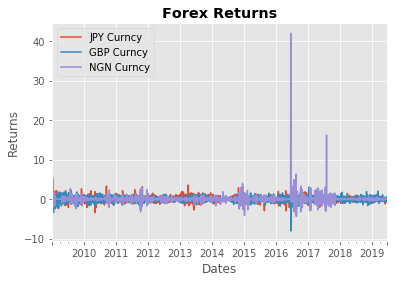

In [25]:
# Graphing of FOREX Returns
plt.figure(figsize=(9,9))
df_fx_ret.plot()
plt.title("Forex Returns", weight='bold')
plt.ylabel("Returns")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 648x648 with 0 Axes>

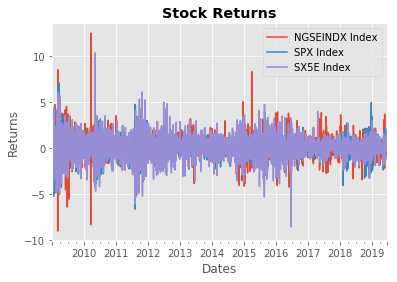

In [26]:
# Graphing of STOCK Returns
plt.figure(figsize=(9,9))
df_stock_ret.plot()
plt.title("Stock Returns", weight='bold')
plt.ylabel("Returns")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 648x648 with 0 Axes>

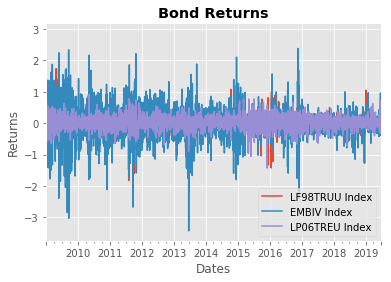

In [27]:
# Graphing of BOND Returns
plt.figure(figsize=(9,9))
df_bond_ret.plot()
plt.title("Bond Returns", weight='bold')
plt.ylabel("Returns")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 648x648 with 0 Axes>

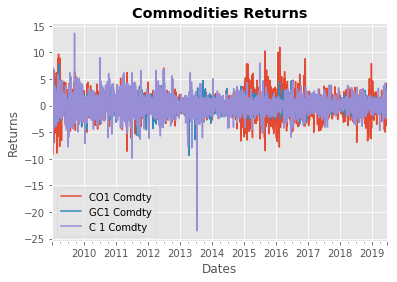

In [28]:
# Graphing of COMMODITIES Returns
plt.figure(figsize=(9,9))
df_commodity_ret.plot()
plt.title("Commodities Returns", weight='bold')
plt.ylabel("Returns")
plt.show

In [29]:
# Calculating and Graphing Stock Cumulative Returns 
df_stock_CumRet =(df_stock_ret + 1).cumprod()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x864 with 0 Axes>

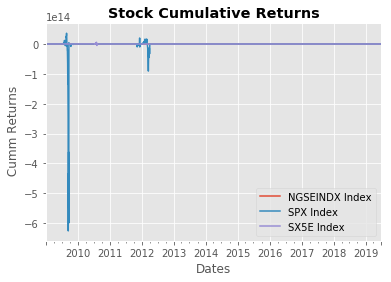

In [30]:
plt.figure(figsize=(20,12))
df_stock_CumRet.plot()
plt.title("Stock Cumulative Returns", weight='bold')
plt.ylabel(" Cumm Returns")
plt.show

In [31]:
# Calculating and Graphing Bond Cumulative Returns 
df_bond_CumRet =(df_bond_ret + 1).cumprod()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x864 with 0 Axes>

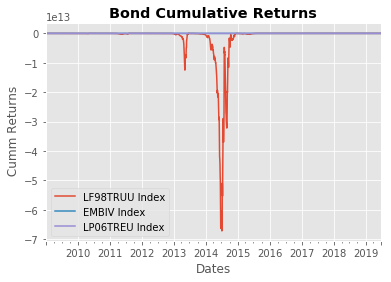

In [32]:
plt.figure(figsize=(20,12))
df_bond_CumRet.plot()
plt.title("Bond Cumulative Returns", weight='bold')
plt.ylabel(" Cumm Returns")
plt.show

In [33]:
# Calculating and Graphing FOREX Cumulative Returns 
df_fx_CumRet =(df_fx_ret + 1).cumprod()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x864 with 0 Axes>

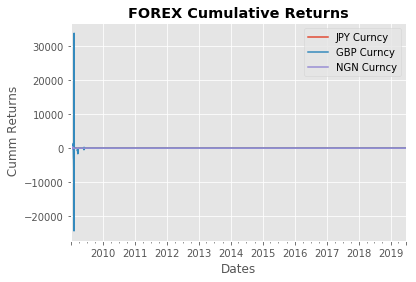

In [34]:
plt.figure(figsize=(20,12))
df_fx_CumRet.plot()
plt.title("FOREX Cumulative Returns", weight='bold')
plt.ylabel(" Cumm Returns")
plt.show

In [35]:
# Calculating and Graphing Commodity Cumulative Returns 
df_commodity_CumRet =(df_commodity_ret + 1).cumprod()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x864 with 0 Axes>

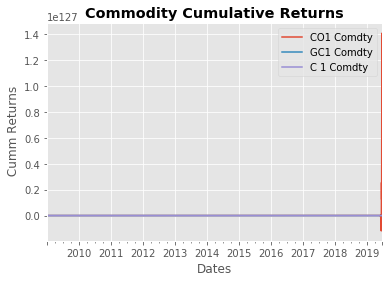

In [36]:
plt.figure(figsize=(20,12))
df_commodity_CumRet.plot()
plt.title("Commodity Cumulative Returns", weight='bold')
plt.ylabel(" Cumm Returns")
plt.show

In [37]:
#Variance-Covariance Approach-FOREX
# Computing Mean and Standard Deviation 
mean_fx_ret,std_fx_ret = np.mean(df_fx_ret), np.std(df_fx_ret)

In [38]:
mean_fx_ret, std_fx_ret

(JPY Curncy                  0.007
 GBP Curncy                 -0.003
 NGN Curncy                  0.040
 dtype: float64, JPY Curncy                  0.597
 GBP Curncy                  0.585
 NGN Curncy                  1.061
 dtype: float64)

In [39]:
# Calculate the VAR using point percentile function for FOREX
VAR_90 = norm.ppf(1-0.9, mean_fx_ret,std_fx_ret)
VAR_95 = norm.ppf(1-0.95, mean_fx_ret,std_fx_ret)
VAR_99 = norm.ppf(1-0.99, mean_fx_ret,std_fx_ret)
print (tabulate([['90%', VAR_90],['95%', VAR_95],["99%", VAR_99]], headers=['Confidence Level', 'Value at Risk-JPY,GBP,NGN']))

Confidence Level    Value at Risk-JPY,GBP,NGN
------------------  -------------------------------------
90%                 [-0.75788087 -0.7523965  -1.32011639]
95%                 [-0.974854   -0.9648004  -1.70557776]
99%                 [-1.38185952 -1.36323481 -2.42863918]


In [40]:
#Variance-Covariance Approach-STOCKS
#Computing mean and Standard deviation
mean_stock_ret,std_stock_ret = np.mean(df_stock_ret),np.std(df_stock_ret)

In [41]:
mean_stock_ret,std_stock_ret

(NGSEINDX Index                  0.004
 SPX Index                       0.047
 SX5E Index                      0.020
 dtype: float64, NGSEINDX Index                  1.108
 SPX Index                       1.018
 SX5E Index                      1.293
 dtype: float64)

In [42]:
# Calculate the VAR using point percentile function for Stocks
VAR_90 = norm.ppf(1-0.9, mean_stock_ret,std_stock_ret)
VAR_95 = norm.ppf(1-0.95, mean_stock_ret,std_stock_ret)
VAR_99 = norm.ppf(1-0.99, mean_stock_ret,std_stock_ret)
print (tabulate([['90%', VAR_90],['95%', VAR_95],["99%", VAR_99]], headers=['Confidence Level', 'Value at Risk-NGSE,SPX,SX5E']))

Confidence Level    Value at Risk-NGSE,SPX,SX5E
------------------  -------------------------------------
90%                 [-1.41548788 -1.25741878 -1.63730509]
95%                 [-1.81796682 -1.62730547 -2.10703888]
99%                 [-2.57295037 -2.32115137 -2.98818135]


In [43]:
#Variance-Covariance Approach-COMMODITIES
#Computing mean and Standard deviation
mean_commodity_ret, std_commodity_ret = np.mean(df_commodity_ret), np.std(df_commodity_ret)

In [44]:
mean_commodity_ret, std_commodity_ret

(CO1 Comdty                  0.032
 GC1 Comdty                  0.023
 C 1 Comdty                  0.019
 dtype: float64, CO1 Comdty                  1.987
 GC1 Comdty                  1.031
 C 1 Comdty                  1.766
 dtype: float64)

In [45]:
# Calculate the VAR using point percentile function for Commodities
VAR_90 = norm.ppf(1-0.9, mean_commodity_ret,std_commodity_ret)
VAR_95 = norm.ppf(1-0.95, mean_commodity_ret,std_commodity_ret)
VAR_99 = norm.ppf(1-0.99, mean_commodity_ret,std_commodity_ret)
print (tabulate([['90%', VAR_90],['95%', VAR_95],["99%", VAR_99]], headers=['Confidence Level', 'Value at Risk-C01,GC1,C1']))

Confidence Level    Value at Risk-C01,GC1,C1
------------------  -------------------------------------
90%                 [-2.51427177 -1.29814224 -2.2440962 ]
95%                 [-3.23598244 -1.67261627 -2.88556824]
99%                 [-4.58979164 -2.37506726 -4.08886312]


In [46]:
#Variance-Covariance Approach-BONDS

#Computing mean and Standard deviation
mean_bond_ret , std_bond_ret = np.mean(df_bond_ret),np.std(df_bond_ret)


In [47]:
mean_bond_ret,std_bond_ret


(LF98TRUU Index                  0.042
 EMBIV Index                     0.012
 LP06TREU Index                  0.018
 dtype: float64, LF98TRUU Index                  0.263
 EMBIV Index                     0.507
 LP06TREU Index                  0.210
 dtype: float64)

In [48]:
# Calculate the VAR using point percentile function for Bonds
VAR_90 = norm.ppf(1-0.9, mean_bond_ret,std_bond_ret)
VAR_95 = norm.ppf(1-0.95, mean_bond_ret,std_bond_ret)
VAR_99 = norm.ppf(1-0.99, mean_bond_ret,std_bond_ret)
print (tabulate([['90%', VAR_90],['95%', VAR_95],["99%", VAR_99]], headers=['Confidence Level', 'Value at Risk-LF98TRUU,EMBIV,LPO6TREU']))

Confidence Level    Value at Risk-LF98TRUU,EMBIV,LPO6TREU
------------------  ---------------------------------------
90%                 [-0.29429056 -0.63713755 -0.25058634]
95%                 [-0.38968662 -0.82127609 -0.32673173]
99%                 [-0.56863375 -1.16668938 -0.46956782]


In [49]:
# Historical Simulation Approach for FOREX, BONDS, COMMODITY AND STOCK

# This is similar to Variance-Covariance approach, first we calculate returns(earlier done)  and sort the return from worst to best


In [50]:
# Sorting of Returns for FOREX

df_fx_ret.sort_values(by=['JPY Curncy','GBP Curncy','NGN Curncy'],inplace = True, ascending =True)


In [51]:
df_fx_ret.head()

,JPY Curncy,GBP Curncy,NGN Curncy
Dates,,,
2016-06-24,-3.711,-8.053,0.178
2010-05-06,-3.443,-1.781,0.133
2016-07-29,-3.049,0.501,1.386
2016-04-28,-3.006,0.454,0.151
2015-08-24,-2.974,0.522,0.000


In [52]:
# Historical Simulation VAR Approach for Forex Return
VaR_90 = df_fx_ret.quantile(0.1)
VaR_95 = df_fx_ret.quantile(0.05)
VaR_99 = df_fx_ret.quantile(0.01)
print (tabulate([['90%', VaR_90],['95%', VaR_95],["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk-JPY,GBP,NGN']))

Confidence Level    Value at Risk-JPY,GBP,NGN
------------------  ---------------------------------
90%                 JPY Curncy                 -0.676
                    GBP Curncy                 -0.659
                    NGN Curncy                 -0.407
                    Name: 0.1, dtype: float64
95%                 JPY Curncy                 -0.936
                    GBP Curncy                 -0.909
                    NGN Curncy                 -0.794
                    Name: 0.05, dtype: float64
99%                 JPY Curncy                 -1.500
                    GBP Curncy                 -1.491
                    NGN Curncy                 -1.939
                    Name: 0.01, dtype: float64


In [53]:
# Sorting of Stock Returns

df_stock_ret.sort_values(by=['NGSEINDX Index','SPX Index','SX5E Index'],inplace = True, ascending =True)

In [54]:
df_stock_ret.head()

,NGSEINDX Index,SPX Index,SX5E Index
Dates,,,
2009-03-09,-9.040,-1.002,-0.400
2010-03-19,-8.370,-0.509,-0.542
2009-06-25,-6.428,2.144,-0.667
2009-07-16,-5.581,0.864,0.324
2009-06-05,-4.560,-0.251,0.647


In [55]:
# Historical Simulation VAR Approach for Stock Return
VaR_90 = df_stock_ret.quantile(0.1)
VaR_95 = df_stock_ret.quantile(0.05)
VaR_99 = df_stock_ret.quantile(0.01)
print (tabulate([['90%', VaR_90],['95%', VaR_95],["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk-NGSE,SPX,SX5E']))

Confidence Level    Value at Risk-NGSE,SPX,SX5E
------------------  -------------------------------------
90%                 NGSEINDX Index                 -1.074
                    SPX Index                      -1.061
                    SX5E Index                     -1.469
                    Name: 0.1, dtype: float64
95%                 NGSEINDX Index                 -1.632
                    SPX Index                      -1.654
                    SX5E Index                     -2.069
                    Name: 0.05, dtype: float64
99%                 NGSEINDX Index                 -2.749
                    SPX Index                      -3.097
                    SX5E Index                     -3.568
                    Name: 0.01, dtype: float64


In [56]:
# Sorting of Returns for Commodity

df_commodity_ret.sort_values(by=['CO1 Comdty','GC1 Comdty','C 1 Comdty'],inplace = True, ascending =True)

In [57]:
df_commodity_ret.head()

,CO1 Comdty,GC1 Comdty,C 1 Comdty
Dates,,,
2009-01-07,-9.242,-2.806,-2.573
2009-03-02,-8.932,-0.265,-2.067
2011-05-05,-8.573,-2.237,-2.959
2015-09-01,-8.476,0.645,-2.131
2016-02-09,-7.786,0.067,-0.345


In [58]:
# Historical Simulation VAR Approach for Commodity Return
VaR_90 = df_commodity_ret.quantile(0.1)
VaR_95 = df_commodity_ret.quantile(0.05)
VaR_99 = df_commodity_ret.quantile(0.01)
print (tabulate([['90%', VaR_90],['95%', VaR_95],["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk-C01,GC1,C1']))

Confidence Level    Value at Risk-C01,GC1,C1
------------------  ---------------------------------
90%                 CO1 Comdty                 -2.272
                    GC1 Comdty                 -1.094
                    C 1 Comdty                 -1.918
                    Name: 0.1, dtype: float64
95%                 CO1 Comdty                 -3.275
                    GC1 Comdty                 -1.621
                    C 1 Comdty                 -2.604
                    Name: 0.05, dtype: float64
99%                 CO1 Comdty                 -5.294
                    GC1 Comdty                 -2.835
                    C 1 Comdty                 -4.444
                    Name: 0.01, dtype: float64


In [59]:
# Sorting of Bond Returns
df_bond_ret.sort_values(by=['LF98TRUU Index','EMBIV Index','LP06TREU Index'],inplace = True, ascending =True)

In [60]:
df_bond_ret.head()

,LF98TRUU Index,EMBIV Index,LP06TREU Index
Dates,,,
2011-08-08,-1.826,0.243,0.788
2011-10-04,-1.619,-1.117,0.002
2016-01-20,-1.426,-0.438,0.204
2009-02-24,-1.388,0.352,-0.103
2015-12-14,-1.337,-0.634,-0.388


In [61]:
# Historical Simulation VAR Approach for Bond Return
VaR_90 = df_bond_ret.quantile(0.1)
VaR_95 = df_bond_ret.quantile(0.05)
VaR_99 = df_bond_ret.quantile(0.01)
print (tabulate([['90%', VaR_90],['95%', VaR_95],["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk-LF98TRUU,EMBIV,LPO6TREU']))

Confidence Level    Value at Risk-LF98TRUU,EMBIV,LPO6TREU
------------------  ---------------------------------------
90%                 LF98TRUU Index                 -0.215
                    EMBIV Index                    -0.541
                    LP06TREU Index                 -0.227
                    Name: 0.1, dtype: float64
95%                 LF98TRUU Index                 -0.351
                    EMBIV Index                    -0.793
                    LP06TREU Index                 -0.325
                    Name: 0.05, dtype: float64
99%                 LF98TRUU Index                 -0.788
                    EMBIV Index                    -1.593
                    LP06TREU Index                 -0.546
                    Name: 0.01, dtype: float64


In [62]:
# Computing Mean for each class of Asset
mean_JPY = df_fx_ret['JPY Curncy'].mean()
mean_GBP = df_fx_ret['GBP Curncy'].mean()
mean_NGN = df_fx_ret['NGN Curncy'].mean()
mean_NGSEINDX = df_stock_ret['NGSEINDX Index'].mean()
mean_SPX = df_stock_ret['SPX Index'].mean()
mean_SX5E = df_stock_ret['SX5E Index'].mean()
mean_CO1 = df_commodity_ret['CO1 Comdty'].mean()
mean_GC1 = df_commodity_ret['GC1 Comdty'].mean()
mean_C1 = df_commodity_ret['C 1 Comdty'].mean()
mean_LF98TRUU = df_bond_ret['LF98TRUU Index'].mean()
mean_EMBIV  = df_bond_ret['EMBIV Index'].mean()
mean_LPO6TREU = df_bond_ret['LP06TREU Index'].mean()


In [63]:
#Computing Standard Deviation for each Class of Asset
std_JPY = df_fx_ret['JPY Curncy'].std()
std_GBP = df_fx_ret['GBP Curncy'].std()
std_NGN = df_fx_ret['NGN Curncy'].std()
std_NGSEINDX = df_stock_ret['NGSEINDX Index'].std()
std_SPX = df_stock_ret['SPX Index'].std()
std_SX5E = df_stock_ret['SX5E Index'].std()
std_CO1 = df_commodity_ret['CO1 Comdty'].std()
std_GC1 = df_commodity_ret['GC1 Comdty'].std()
std_C1 = df_commodity_ret['C 1 Comdty'].std()
std_LF98TRUU = df_bond_ret['LF98TRUU Index'].std()
std_EMBIV = df_bond_ret['EMBIV Index'].std()
std_LPO6TREU = df_bond_ret['LP06TREU Index'].std()

In [64]:
# Modelling VAR using MONTE CARLO SIMULATION ASSUMING NORMAL DISTRIBUTION OF RETURNS

In [65]:
# Modelling VAR using MONTE CARLO SIMULATION FOR JPY Curncy
sp.random.seed(42)
nsims =1000
sim_VaR_JPY= sp.random.normal(mean_JPY, std_JPY, nsims)


In [66]:
sim_VaR_JPY[1:30]

array([-0.07509605,  0.39438073,  0.91725234, -0.13237391, -0.1323641 ,
        0.95081236,  0.46590926, -0.27293928,  0.33158385, -0.26932141,
       -0.27070248,  0.15202641, -1.13537439, -1.02285902, -0.32837978,
       -0.59750503,  0.19520478, -0.53490016, -0.8361238 ,  0.88297663,
       -0.12736999,  0.04783092, -0.84355732, -0.31768462,  0.07375188,
       -0.68003423,  0.23191139, -0.35128825, -0.16674476])

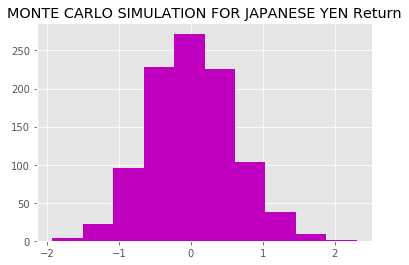

In [67]:
plt.hist(sim_VaR_JPY, color='m')
plt.title("MONTE CARLO SIMULATION FOR JAPANESE YEN Return")
plt.show()

In [68]:
sims_VaR_JPY= np.percentile(sim_VaR_JPY,1)
print('simulated VaR is',sims_VaR_JPY )

simulated VaR is -1.2363650447578034


In [69]:
# Modelling VAR using MONTE CARLO SIMULATION FOR GBP Curncy   
sp.random.seed(42)
nsims =1000
sim_Ret_GBP= sp.random.normal(mean_GBP, std_GBP, nsims)



In [70]:
sim_Ret_GBP[1:30]

array([-0.08399043,  0.37559965,  0.88746012, -0.14006207, -0.14005247,
        0.92031341,  0.44562187, -0.27766728,  0.31412521, -0.2741256 ,
       -0.27547759,  0.13834907, -1.1219404 , -1.01179449, -0.33194026,
       -0.59539801,  0.18061814, -0.53411154, -0.82899172,  0.85390623,
       -0.13516354,  0.03634783, -0.8362687 , -0.32147033,  0.06172292,
       -0.67618924,  0.21655176, -0.3543663 , -0.17370911])

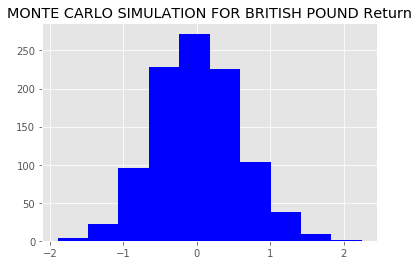

In [71]:
plt.hist(sim_Ret_GBP, color='b')
plt.title("MONTE CARLO SIMULATION FOR BRITISH POUND Return")
plt.show()

In [72]:
sim_VaR_GBP= np.percentile(sim_Ret_GBP,1)
print('simulated VaR is',sim_VaR_GBP )

simulated VaR is -1.220804294413737


In [73]:
   
# Modelling VAR using MONTE CARLO SIMULATION FOR NGN Curncy   
sp.random.seed(42)
nsims =1000
sim_Ret_NGN= sp.random.normal(mean_NGN, std_NGN, nsims)


In [74]:
sim_Ret_NGN[1:30]

array([-0.10712214,  0.72692195,  1.65582407, -0.20887852, -0.2088611 ,
        1.71544478,  0.85399523, -0.45859846,  0.61536081, -0.45217117,
       -0.4546247 ,  0.29636992, -1.99074859, -1.79086057, -0.5570907 ,
       -1.03520236,  0.37307799, -0.92398234, -1.45911806,  1.59493192,
       -0.19998886,  0.1112625 , -1.472324  , -0.53809033,  0.15731212,
       -1.18181877,  0.43828875, -0.59778851, -0.2699397 ])

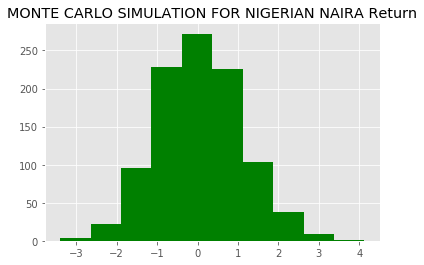

In [75]:
plt.hist(sim_Ret_NGN, color='g')
plt.title("MONTE CARLO SIMULATION FOR NIGERIAN NAIRA Return")
plt.show()

In [76]:
sim_VaR_NGN = np.percentile(sim_Ret_NGN,1)
print('simulated VaR is',sim_VaR_NGN )

simulated VaR is -2.1701624815856424


In [77]:
# Modelling VAR using MONTE CARLO SIMULATION FOR NGSEINDX Index  
sp.random.seed(42)
nsims =1000
sim_Ret_NGSEINDX= sp.random.normal(mean_NGSEINDX, std_NGSEINDX, nsims)

In [78]:
sim_Ret_NGSEINDX[1:30]

array([-0.14894165,  0.7219243 ,  1.69183613, -0.25519043, -0.25517224,
        1.754089  ,  0.85460768, -0.51593516,  0.60543789, -0.50922411,
       -0.51178596,  0.272364  , -2.11572754, -1.90701475, -0.61877569,
       -1.1179953 ,  0.35245863, -1.00186507, -1.56062627,  1.62825568,
       -0.24590831,  0.07908435, -1.57441524, -0.59893647,  0.127167  ,
       -1.27108461,  0.42054835, -0.66127025, -0.31894738])

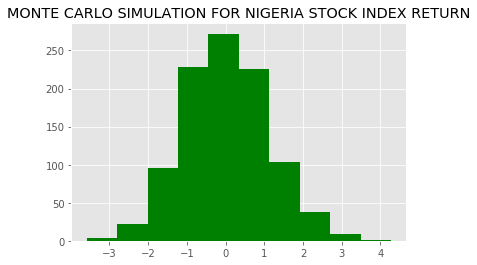

In [79]:
plt.hist(sim_Ret_NGSEINDX, color='g')
plt.title("MONTE CARLO SIMULATION FOR NIGERIA STOCK INDEX RETURN")
plt.show()

In [80]:
sim_VaR_NGSEINDX = np.percentile(sim_Ret_NGSEINDX,1)
print('simulated VaR is',sim_VaR_NGSEINDX )

simulated VaR is -2.3030622961216407


In [81]:
# Modelling VAR using MONTE CARLO SIMULATION FOR SPX Index 
sp.random.seed(42)
nsims =1000
sim_Ret_SPX= sp.random.normal(mean_SPX, std_SPX, nsims)

In [82]:
sim_Ret_SPX[1:30]

array([-0.09343593,  0.70690836,  1.5982779 , -0.19108081, -0.19106409,
        1.65548962,  0.8288472 , -0.43071075,  0.59985487, -0.42454315,
       -0.42689755,  0.29375291, -1.90095389, -1.7091424 , -0.52522337,
       -0.98401679,  0.36736157, -0.87729064, -1.39080405,  1.53984612,
       -0.18255035,  0.11612481, -1.4034764 , -0.50699072,  0.16031378,
       -1.12470912,  0.42993747, -0.56427678, -0.2496748 ])

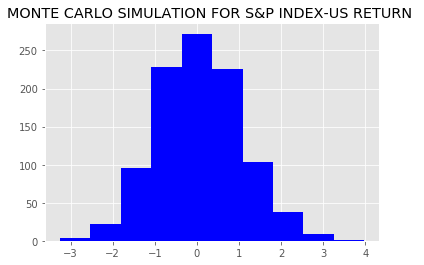

In [83]:
plt.hist(sim_Ret_SPX, color='b')
plt.title("MONTE CARLO SIMULATION FOR S&P INDEX-US RETURN ")
plt.show()

In [84]:
sim_VaR_SPX = np.percentile(sim_Ret_SPX,1)
print('simulated VaR is',sim_VaR_SPX )

simulated VaR is -2.073118502404191


In [85]:
sp.random.seed(42)
nsims =1000
sim_Ret_SX5E = sp.random.normal(mean_SX5E, std_SX5E, nsims)

In [86]:
sim_Ret_SX5E[1:30]

array([-0.15911704,  0.85727196,  1.98925754, -0.28312015, -0.28309892,
        2.06191297,  1.01212694, -0.58743572,  0.72132049, -0.57960324,
       -0.58259319,  0.33258944, -2.45455587, -2.21096685, -0.70746106,
       -1.29010104,  0.426068  , -1.15456527, -1.80669633,  1.9150527 ,
       -0.27228697,  0.10701247, -1.82278946, -0.68430669,  0.1631298 ,
       -1.46877181,  0.50553562, -0.75705653, -0.35753098])

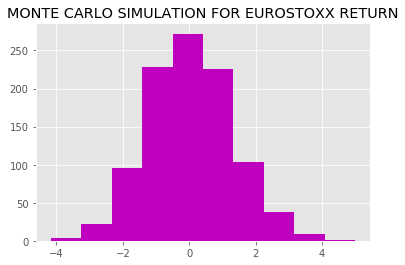

In [87]:
plt.hist(sim_Ret_SX5E, color='m')
plt.title("MONTE CARLO SIMULATION FOR EUROSTOXX RETURN")
plt.show()

In [88]:
sim_VaR_SX5E = np.percentile(sim_Ret_SX5E,1)
print('simulated VaR is',sim_VaR_SX5E)

simulated VaR is -2.6731945569845763


In [89]:
# Modelling VAR using MONTE CARLO SIMULATION FOR BONDS- LF98TRUU Index, EMBIV Index,LP06TREU Index  
sp.random.seed(42)
nsims =1000
sim_Ret_LF98TRUU= sp.random.normal(mean_LF98TRUU, std_LF98TRUU, nsims)




In [90]:
sim_Ret_LF98TRUU[1:30]

array([ 0.00590779,  0.21232151,  0.44221121, -0.01927543, -0.01927112,
        0.45696647,  0.24377029, -0.08107746,  0.18471176, -0.0794868 ,
       -0.08009402,  0.10576618, -0.46026223, -0.41079287, -0.10545285,
       -0.2237785 ,  0.1247503 , -0.19625317, -0.32869144,  0.4271413 ,
       -0.01707537,  0.05995479, -0.33195972, -0.10075054,  0.0713514 ,
       -0.26006392,  0.14088901, -0.11552497, -0.03438718])

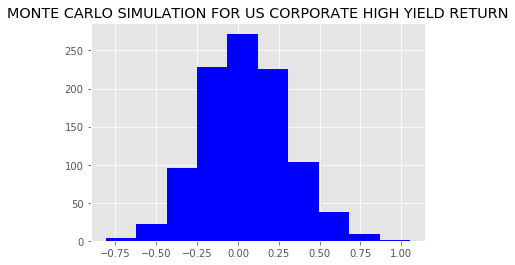

In [91]:
plt.hist(sim_Ret_LF98TRUU, color='b')
plt.title("MONTE CARLO SIMULATION FOR US CORPORATE HIGH YIELD RETURN")
plt.show()

In [92]:
sim_VaR_LF98TRUU = np.percentile(sim_Ret_LF98TRUU,1)
print('simulated VaR is',sim_VaR_LF98TRUU)

simulated VaR is -0.5046645477588729


In [93]:
sp.random.seed(42)
nsims =1000
sim_Ret_EMBIV = sp.random.normal(mean_EMBIV ,std_EMBIV , nsims)


In [94]:
sim_Ret_EMBIV[1:30]

array([-0.0576787 ,  0.34075206,  0.7844974 , -0.10628869, -0.10628037,
        0.81297878,  0.40145617, -0.22558227,  0.28745824, -0.22251189,
       -0.22368397,  0.13507327, -0.9575049 , -0.8620165 , -0.27263295,
       -0.50103142,  0.17171745, -0.44790056, -0.70353996,  0.75540864,
       -0.10204202,  0.04664571, -0.70984857, -0.26355629,  0.06864405,
       -0.57107146,  0.20286924, -0.29207468, -0.13545819])

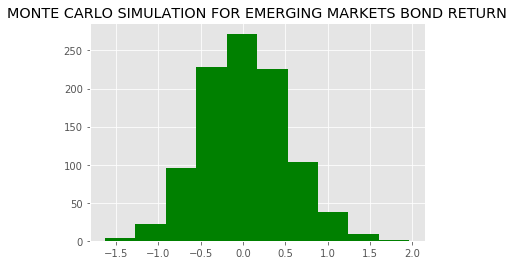

In [95]:
plt.hist(sim_Ret_EMBIV, color='g')
plt.title("MONTE CARLO SIMULATION FOR EMERGING MARKETS BOND RETURN")
plt.show()

In [96]:
sim_VaR_EMBIV = np.percentile(sim_Ret_EMBIV,1)
print('simulated VaR is',sim_VaR_EMBIV)

simulated VaR is -1.0432126156616328


In [97]:
sp.random.seed(42)
nsims =1000
sim_Ret_LP06TREU = sp.random.normal(mean_LPO6TREU, std_LPO6TREU, nsims)

In [98]:
sim_Ret_LP06TREU[1:30]

array([-0.01096719,  0.15379281,  0.33729139, -0.03106851, -0.03106506,
        0.34906908,  0.17889531, -0.08039906,  0.13175463, -0.07912939,
       -0.07961407,  0.06874004, -0.38306538, -0.3435788 , -0.09985556,
       -0.19430342,  0.08389323, -0.17233263, -0.27804522,  0.32526254,
       -0.02931241,  0.03217327, -0.28065397, -0.09610216,  0.04127008,
       -0.22326654,  0.09677519, -0.10789515, -0.04313075])

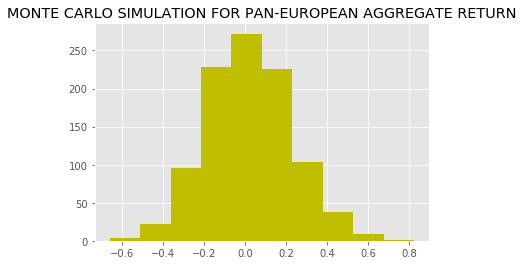

In [99]:
plt.hist(sim_Ret_LP06TREU, color='y')
plt.title("MONTE CARLO SIMULATION FOR PAN-EUROPEAN AGGREGATE RETURN")
plt.show()

In [100]:
sim_VaR_LP06TREU = np.percentile(sim_Ret_LP06TREU,1)
print('simulated VaR is',sim_VaR_LP06TREU)

simulated VaR is -0.41850742907590816


In [101]:
sp.random.seed(42)
nsims =1000
sim_Ret_CO1 = sp.random.normal(mean_CO1,std_CO1, nsims)


In [102]:
sim_Ret_CO1[1:30]

array([-0.2431469 ,  1.31845842,  3.05766921, -0.43366836, -0.43363574,
        3.16929882,  1.55638146, -0.90122637,  1.1095792 , -0.88919236,
       -0.89378618,  0.51232316, -3.76991619, -3.39565996, -1.08563629,
       -1.98081884,  0.65594595, -1.7725783 , -2.77452868,  2.94365905,
       -0.417024  ,  0.16574109, -2.79925456, -1.05006133,  0.25196115,
       -2.25533305,  0.77804197, -1.16183599, -0.54799501])

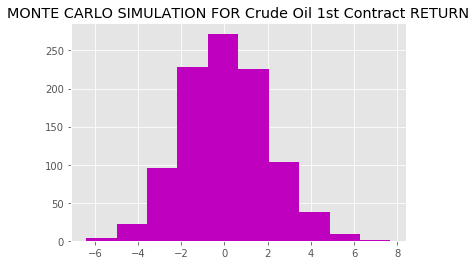

In [103]:
plt.hist(sim_Ret_CO1, color='m')
plt.title("MONTE CARLO SIMULATION FOR Crude Oil 1st Contract RETURN")
plt.show()

In [104]:
sim_VaR_CO1 = np.percentile(sim_Ret_CO1,1)
print('simulated VaR is',sim_VaR_CO1)

simulated VaR is -4.105838098126953


In [105]:
sp.random.seed(42)
nsims =1000
sim_Ret_GC1 = sp.random.normal(mean_GC1, std_GC1, nsims)

In [106]:
sim_Ret_GC1[1:30]

array([-0.11972365,  0.69054653,  1.59297085, -0.21857952, -0.2185626 ,
        1.65089211,  0.81399766, -0.46118135,  0.58216536, -0.45493727,
       -0.45732086,  0.27226711, -1.94965848, -1.75546815, -0.55686613,
       -1.02134951,  0.34678867, -0.91329974, -1.43318175,  1.5338144 ,
       -0.20994326,  0.09243607, -1.44601127, -0.53840735,  0.13717307,
       -1.16378671,  0.41014064, -0.59640387, -0.27790019])

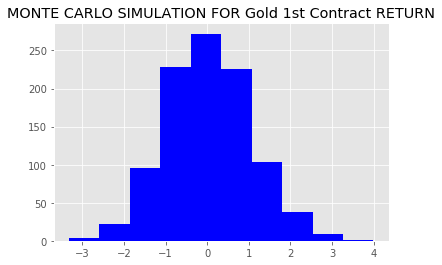

In [107]:
plt.hist(sim_Ret_GC1, color='b')
plt.title("MONTE CARLO SIMULATION FOR Gold 1st Contract RETURN")
plt.show()

In [108]:
sim_VaR_GC1 = np.percentile(sim_Ret_GC1,1)
print('simulated VaR is',sim_VaR_GC1)

simulated VaR is -2.1239582862385045


In [109]:
sp.random.seed(42)
nsims =1000
sim_Ret_C1 = sp.random.normal(mean_C1, std_C1, nsims)

In [110]:
sim_Ret_C1[1:30]

array([-0.22547132,  1.16251725,  2.70836539, -0.39481092, -0.39478192,
        2.8075842 ,  1.37398839, -0.81038658,  0.97686088, -0.79969049,
       -0.80377358,  0.4460068 , -3.3601401 , -3.02749308, -0.9742941 ,
       -1.7699517 ,  0.57366184, -1.58486301, -2.47541817,  2.6070307 ,
       -0.38001705,  0.13795716, -2.49739507, -0.94267431,  0.21459142,
       -2.01394587,  0.68218343, -1.04202205, -0.49642691])

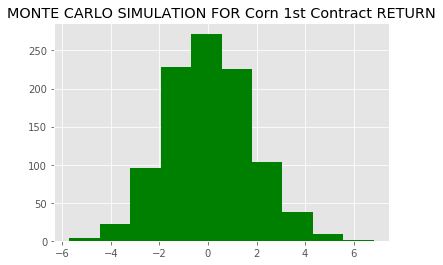

In [111]:
plt.hist(sim_Ret_C1, color='g')
plt.title("MONTE CARLO SIMULATION FOR Corn 1st Contract RETURN")
plt.show()

In [112]:
sim_VaR_C1 = np.percentile(sim_Ret_C1,1)
print('simulated VaR is',sim_VaR_C1)

simulated VaR is -3.6587147569887573



Optimal Weights:

[0.00558259 0.16305256 0.06778163 0.02122202 0.06274466 0.0942856
 0.04748143 0.01307053 0.07251581 0.10909751 0.17295661 0.17020904]


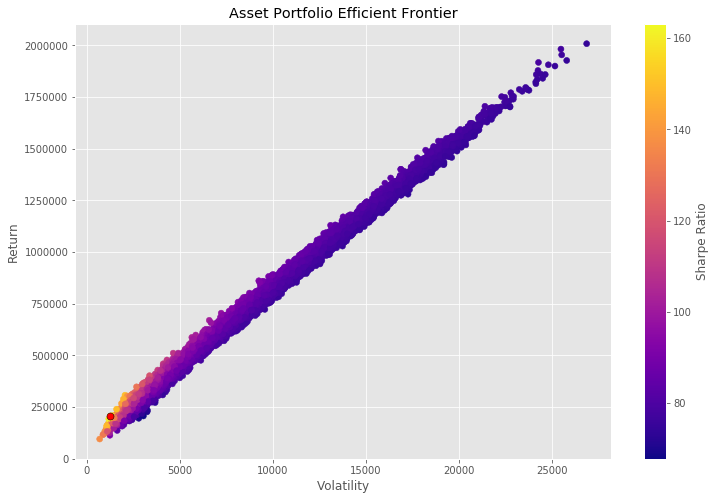

In [113]:
# CALCULATING OPTIMAL WEIGHT PORTFOLIO ASSET CLASS
JPY = data['JPY Curncy']
GBP = data['GBP Curncy']
NGN = data['NGN Curncy']
NGSEINDX = data['NGSEINDX Index']
SPX = data['SPX Index']
SX5E = data['SX5E Index']
CO1 = data['CO1 Comdty']
GC1 = data['GC1 Comdty']
C1 = data['C 1 Comdty']
LF98TRUU = data['LF98TRUU Index']
EMBIV = data['EMBIV Index']
LP06TREU = data['LP06TREU Index']
all_assets = pd.concat([JPY,GBP,NGN,NGSEINDX,SPX,SX5E,CO1,GC1,C1,LF98TRUU,EMBIV,LP06TREU],axis=1)
all_assets.columns = ['JPY','GBP','NGN','NGSEINDX','SPX','SX5E','CO1','GC1','C1','LF98TRUU','EMBIV','LP06TREU']
log_ret = np.log(all_assets/all_assets.shift(1))
log_ret.head()
num_ports = 10000
all_weights = np.zeros((num_ports,len(all_assets.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(12))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights
    # Expected Return
    ret_arr[ind] = np.sum((all_assets.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(all_assets.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    
best = sharpe_arr.argmax()
print("")
print("Optimal Weights:")
print("")
print(all_weights[ind,:]) 
max_sr_ret = ret_arr[best]
max_sr_vol = vol_arr[best]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.title("Asset Portfolio Efficient Frontier")
plt.xlabel('Volatility')
plt.ylabel('Return')


# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
plt.show()

In [114]:
# ASSUMING AN INVESTMENT OF 1,0000,000 IN THE ASSET PORTFOLIO @ 99% Confidence Level
position = 1000000
weight = all_weights[ind,:]
confidence_level=0.99      
z=norm.ppf(confidence_level) 

tickers = dataReturns.columns
# Get porfolio returns
portRet=sp.dot(dataReturns,weight)
portStd=sp.std(portRet)
portMean=sp.mean(portRet)
VaR=position*(portMean-z*portStd)
print()
print("Portfolio Holding=",position, "VaR=", round(VaR,2))

# compare
total2=0.0
n=len(dataReturns.columns)
for i in np.arange(n):
    all_assets=tickers[i]
    ret=dataReturns[all_assets]
    position2=position*weight[i]
    mean=sp.mean(ret)
    std=sp.std(ret)
    VaR=position2*(mean-z*std)
    total2+=VaR
    print("")
    print("For ", all_assets, "with a value of ", position2, "VaR=", round(VaR,2))

print()
print("Sum of twelve VaR=",round(total2,2))




Portfolio Holding= 1000000 VaR= -8022.5

For  JPY Curncy with a value of  5582.586332525412 VaR= -77.14

For  GBP Curncy with a value of  163052.5627311816 VaR= -2222.79

For  NGN Curncy with a value of  67781.63432928435 VaR= -1646.17

For  NGSEINDX Index with a value of  21222.016163651715 VaR= -546.03

For  SPX Index with a value of  62744.660307800485 VaR= -1456.4

For  SX5E Index with a value of  94285.60476207682 VaR= -2817.42

For  CO1 Comdty with a value of  47481.432085592736 VaR= -2179.3

For  GC1 Comdty with a value of  13070.528727802179 VaR= -310.43

For  C 1 Comdty with a value of  72515.80826160064 VaR= -2965.07

For  LF98TRUU Index with a value of  109097.51388618562 VaR= -620.37

For  EMBIV Index with a value of  172956.61406268182 VaR= -2017.87

For  LP06TREU Index with a value of  170209.03834961657 VaR= -799.25

Sum of twelve VaR= -17658.24


In [115]:
# ASSUMING AN INVESTMENT OF 1,0000,000 IN ASSET PORTFOLIO  @ 95% Confidence Level
position = 1000000
weight = all_weights[ind,:]
confidence_level=0.95      
z=norm.ppf(confidence_level) 

tickers = dataReturns.columns
# Get porfolio returns
portRet=sp.dot(dataReturns,weight)
portStd=sp.std(portRet)
portMean=sp.mean(portRet)
VaR=position*(portMean-z*portStd)
print()
print("Portfolio Holding=",position, "VaR=", round(VaR,2))

# compare
total2=0.0
n=len(dataReturns.columns)
for i in np.arange(n):
    all_assets=tickers[i]
    ret=dataReturns[all_assets]
    position2=position*weight[i]
    mean=sp.mean(ret)
    std=sp.std(ret)
    VaR=position2*(mean-z*std)
    total2+=VaR
    print("")
    print("For ", all_assets, "with a value of ", position2, "VaR=", round(VaR,2))

print()
print("Sum of twelve VaR=",round(total2,2))


Portfolio Holding= 1000000 VaR= -5613.45

For  JPY Curncy with a value of  5582.586332525412 VaR= -54.42

For  GBP Curncy with a value of  163052.5627311816 VaR= -1573.13

For  NGN Curncy with a value of  67781.63432928435 VaR= -1156.07

For  NGSEINDX Index with a value of  21222.016163651715 VaR= -385.81

For  SPX Index with a value of  62744.660307800485 VaR= -1021.05

For  SX5E Index with a value of  94285.60476207682 VaR= -1986.63

For  CO1 Comdty with a value of  47481.432085592736 VaR= -1536.49

For  GC1 Comdty with a value of  13070.528727802179 VaR= -218.62

For  C 1 Comdty with a value of  72515.80826160064 VaR= -2092.49

For  LF98TRUU Index with a value of  109097.51388618562 VaR= -425.14

For  EMBIV Index with a value of  172956.61406268182 VaR= -1420.45

For  LP06TREU Index with a value of  170209.03834961657 VaR= -556.13

Sum of twelve VaR= -12426.43


In [116]:
# ASSUMING AN INVESTMENT OF 1,0000,000 IN THE ASSET PORTFOLIO @ 90% Confidence Level
position = 1000000
weight = all_weights[ind,:]
confidence_level=0.90      
z=norm.ppf(confidence_level) 

tickers = dataReturns.columns
# Get porfolio returns
portRet=sp.dot(dataReturns,weight)
portStd=sp.std(portRet)
portMean=sp.mean(portRet)
VaR=position*(portMean-z*portStd)
print()
print("Portfolio Holding=",position, "VaR=", round(VaR,2))

# compare
total2=0.0
n=len(dataReturns.columns)
for i in np.arange(n):
    all_assets=tickers[i]
    ret=dataReturns[all_assets]
    position2=position*weight[i]
    mean=sp.mean(ret)
    std=sp.std(ret)
    VaR=position2*(mean-z*std)
    total2+=VaR
    print("")
    print("For ", all_assets, "with a value of ", position2, "VaR=", round(VaR,2))

print()
print("Sum of twelve VaR=",round(total2,2))


Portfolio Holding= 1000000 VaR= -4329.19

For  JPY Curncy with a value of  5582.586332525412 VaR= -42.31

For  GBP Curncy with a value of  163052.5627311816 VaR= -1226.8

For  NGN Curncy with a value of  67781.63432928435 VaR= -894.8

For  NGSEINDX Index with a value of  21222.016163651715 VaR= -300.4

For  SPX Index with a value of  62744.660307800485 VaR= -788.96

For  SX5E Index with a value of  94285.60476207682 VaR= -1543.74

For  CO1 Comdty with a value of  47481.432085592736 VaR= -1193.81

For  GC1 Comdty with a value of  13070.528727802179 VaR= -169.67

For  C 1 Comdty with a value of  72515.80826160064 VaR= -1627.32

For  LF98TRUU Index with a value of  109097.51388618562 VaR= -321.06

For  EMBIV Index with a value of  172956.61406268182 VaR= -1101.97

For  LP06TREU Index with a value of  170209.03834961657 VaR= -426.52

Sum of twelve VaR= -9637.38


In [117]:
# Comparative Analsysis of Parametric and Non-Parametric Methodologies with Expected Shortfall and Stress VaR

Sample mean  = 0.00007
Sample stdev = 0.00597

nu = 4.00

99% 1-day Normal VaR     = 1.38%
99% 1-day Normal t CVaR  = 1.58%
99% 1-day Student t VaR  = 1.57%
99% 1-day Student t CVaR = 2.76%


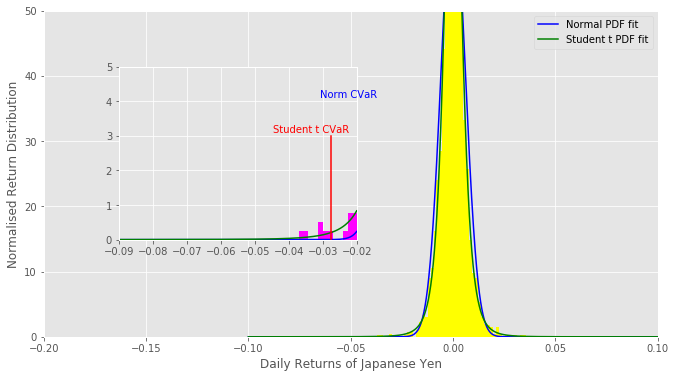

In [118]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of JPY Curncy  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['JPY Curncy'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='yellow', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Japanese Yen")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = -0.00003
Sample stdev = 0.00585

nu = 5.00

99% 1-day Normal VaR     = 1.36%
99% 1-day Normal t CVaR  = 1.56%
99% 1-day Student t VaR  = 1.53%
99% 1-day Student t CVaR = 2.29%


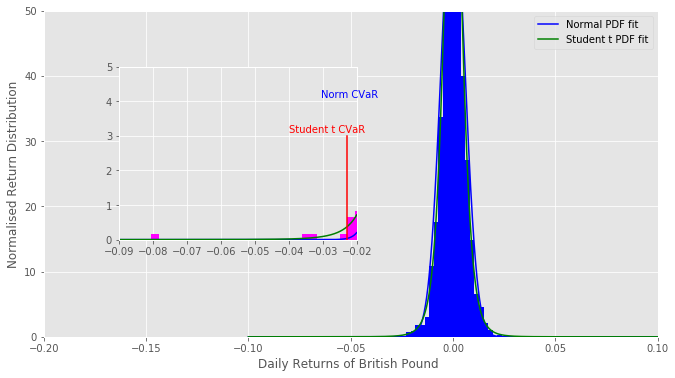

In [119]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of GBP Curncy  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['GBP Curncy'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='blue', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of British Pound ")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00040
Sample stdev = 0.01061

nu = 1.00

99% 1-day Normal VaR     = 2.43%
99% 1-day Normal t CVaR  = 2.79%
99% 1-day Student t VaR  = nan%
99% 1-day Student t CVaR = -inf%


posx and posy should be finite values
posx and posy should be finite values


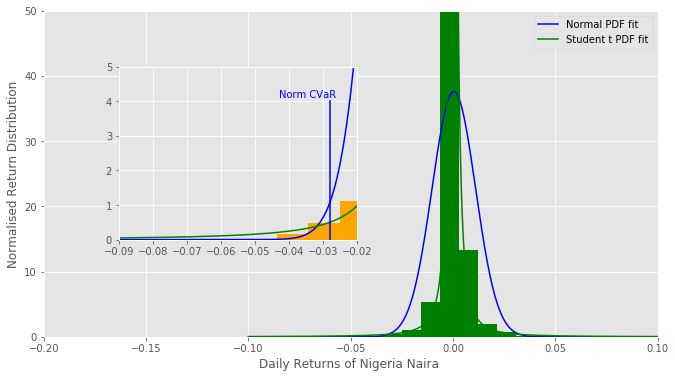

In [120]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of NGN Curncy  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['NGN Curncy'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='green', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Nigeria Naira ")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='orange', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00047
Sample stdev = 0.01018

nu = 2.00

99% 1-day Normal VaR     = 2.32%
99% 1-day Normal t CVaR  = 2.67%
99% 1-day Student t VaR  = -0.05%
99% 1-day Student t CVaR = 13.71%


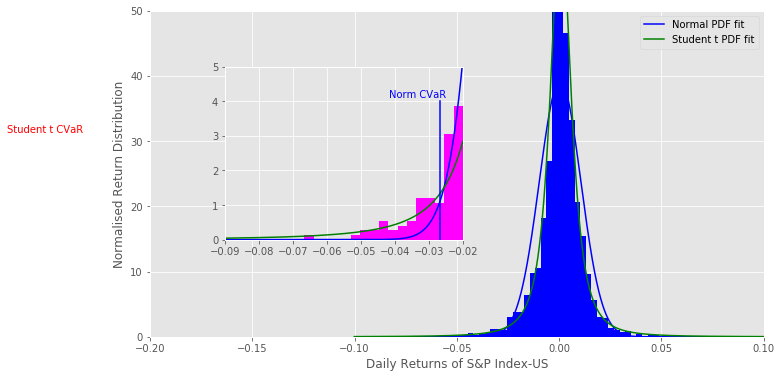

In [121]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of SPX Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['SPX Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='blue', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of S&P Index-US")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00004
Sample stdev = 0.01108

nu = 2.00

99% 1-day Normal VaR     = 2.57%
99% 1-day Normal t CVaR  = 2.95%
99% 1-day Student t VaR  = -0.00%
99% 1-day Student t CVaR = 14.97%


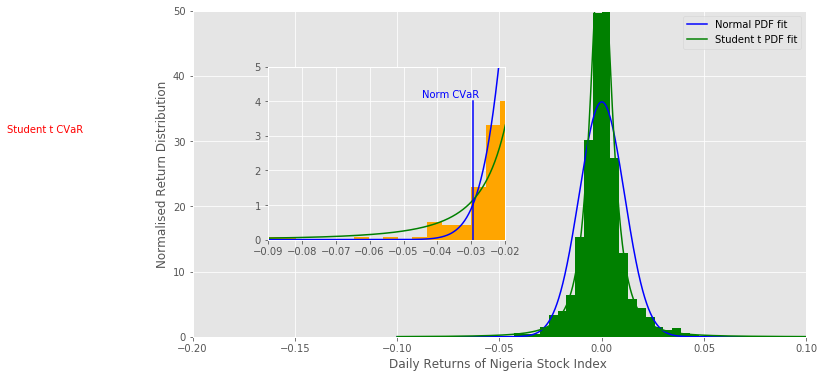

In [122]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of NGSEINDX Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['NGSEINDX Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='green', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Nigeria Stock Index ")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='orange', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00020
Sample stdev = 0.01293

nu = 3.00

99% 1-day Normal VaR     = 2.99%
99% 1-day Normal t CVaR  = 3.43%
99% 1-day Student t VaR  = 3.37%
99% 1-day Student t CVaR = 8.27%


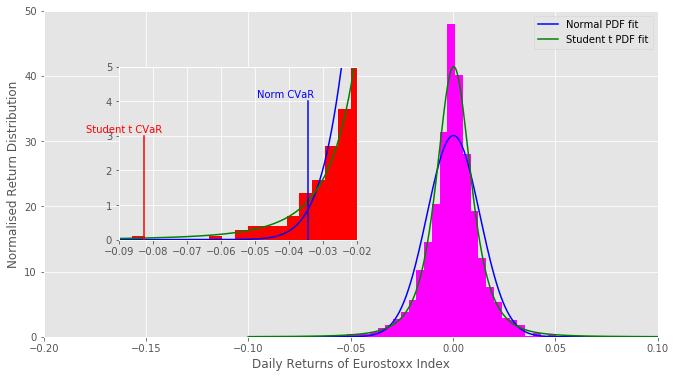

In [123]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of SX5E Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['SX5E Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Eurostoxx Index")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='red', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00032
Sample stdev = 0.01987

nu = 3.00

99% 1-day Normal VaR     = 4.59%
99% 1-day Normal t CVaR  = 5.26%
99% 1-day Student t VaR  = 5.18%
99% 1-day Student t CVaR = 12.70%


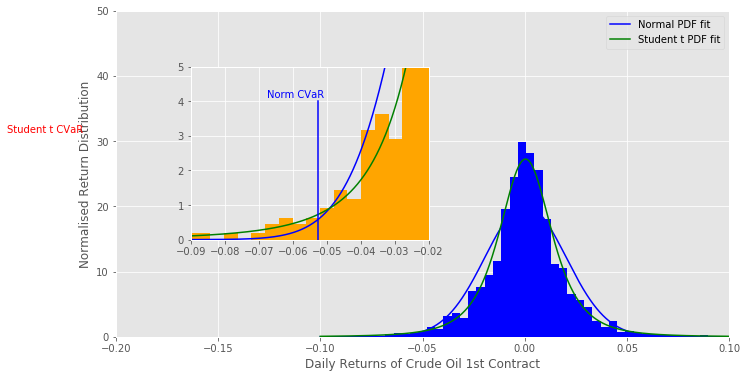

In [124]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of CO1 Comdty  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['CO1 Comdty'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='blue', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Crude Oil 1st Contract")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='orange', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00023
Sample stdev = 0.01031

nu = 3.00

99% 1-day Normal VaR     = 2.38%
99% 1-day Normal t CVaR  = 2.72%
99% 1-day Student t VaR  = 2.68%
99% 1-day Student t CVaR = 6.58%


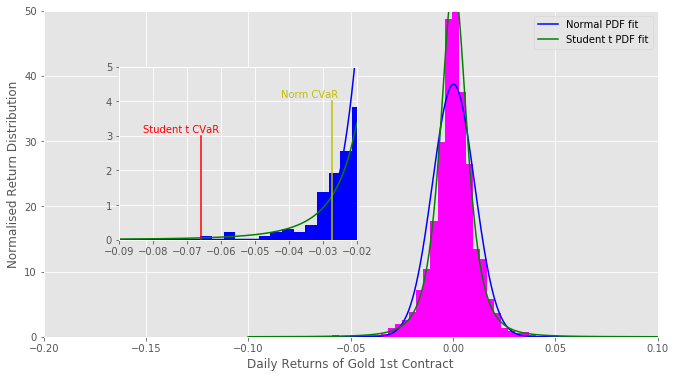

In [125]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of GC1 Comdty  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['GC1 Comdty'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Gold 1st Contract")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='blue', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='y')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='y')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00019
Sample stdev = 0.01766

nu = 4.00

99% 1-day Normal VaR     = 4.09%
99% 1-day Normal t CVaR  = 4.69%
99% 1-day Student t VaR  = 4.66%
99% 1-day Student t CVaR = 8.18%


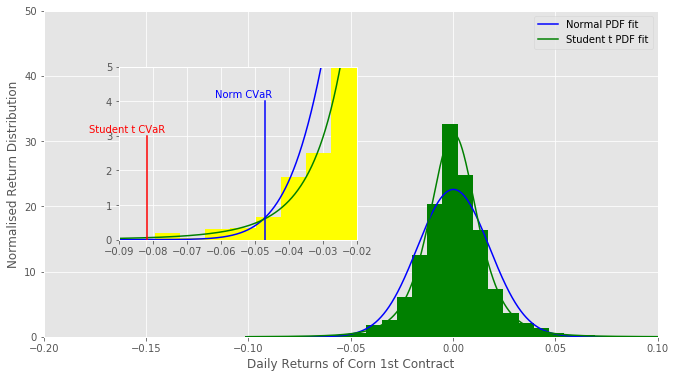

In [126]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of C 1 Comdty  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['C 1 Comdty'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='green', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Corn 1st Contract")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='yellow', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00042
Sample stdev = 0.00263

nu = 2.00

99% 1-day Normal VaR     = 0.57%
99% 1-day Normal t CVaR  = 0.66%
99% 1-day Student t VaR  = -0.04%
99% 1-day Student t CVaR = 3.51%


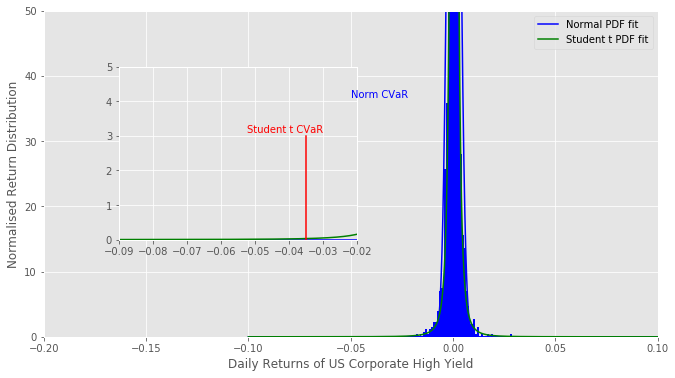

In [127]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of LF98TRUU Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['LF98TRUU Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='blue', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of US Corporate High Yield")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='orange', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00012
Sample stdev = 0.00507

nu = 3.00

99% 1-day Normal VaR     = 1.17%
99% 1-day Normal t CVaR  = 1.34%
99% 1-day Student t VaR  = 1.32%
99% 1-day Student t CVaR = 3.24%


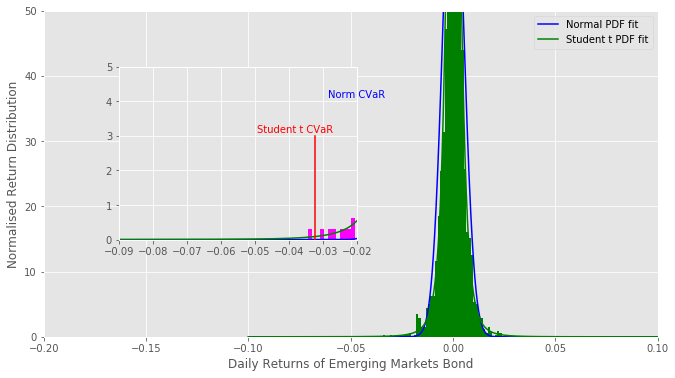

In [128]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of EMBIV Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['EMBIV Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='green', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Emerging Markets Bond")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

Sample mean  = 0.00018
Sample stdev = 0.00210

nu = 2.00

99% 1-day Normal VaR     = 0.47%
99% 1-day Normal t CVaR  = 0.54%
99% 1-day Student t VaR  = -0.02%
99% 1-day Student t CVaR = 2.81%


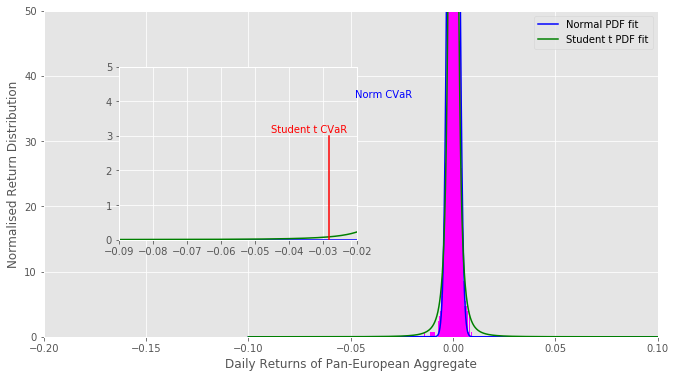

In [129]:
#Source: http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/
# Computing and Ploting VaR and CVaR of LP06TREU Index  @ 99% Confidence Levelfor comparative analsysis
cp = np.array(data['LP06TREU Index'].values)  # daily prices
ret = cp[1:]/cp[:-1] - 1    # compute daily returns
 
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(ret)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(ret)
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm
 
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))
 
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(ret, bins=50, normed=True, color='magenta', edgecolor='none')
plt.axis("tight")
plt.plot(x, pdf, 'b', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf2, 'g', label="Student t PDF fit")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Pan-European Aggregate")
plt.ylabel("Normalised Return Distribution")
# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(ret, bins=50, normed=True, color='yellow', edgecolor='none')
plt.plot(x, pdf, 'b')
plt.plot(x, pdf2, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Norm CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

In [130]:
# Calculating Stress VAR of the Asset Classes using log normal distribution

In [131]:
# STRESS VAR FOR JPY Curncy   
s1_JPY = np.random.lognormal(mean_JPY,std_JPY,100)
s2 = np.sort(s1_JPY)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-JPY Curncy']))

Confidence Level      Stresss VaR-JPY Curncy
------------------  ------------------------
90%                                  2.3379
95%                                  2.6185
99%                                  4.23833


In [132]:
# STRESS VAR FOR GBP Curncy 
s1_GBP = np.random.lognormal(mean_GBP,std_GBP,100)
s2 = np.sort(s1_GBP)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR- GBP Curncy']))

Confidence Level      Stresss VaR- GBP Curncy
------------------  -------------------------
90%                                   2.06677
95%                                   2.441
99%                                   3.78836


In [133]:
# STRESS VAR FOR NGN Curncy 
s1_NGN = np.random.lognormal(mean_NGN,std_NGN,1000)
s2 = np.sort(s1_NGN)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-NGN Curncy']))

Confidence Level      Stresss VaR-NGN Curncy
------------------  ------------------------
90%                                 0.255608
95%                                 0.262254
99%                                 0.266719


In [134]:
# STRESS VAR FOR NGSEINDX 
s1_NGSEINDX = np.random.lognormal(mean_NGSEINDX,std_NGSEINDX,100)
s2 = np.sort(s1_NGSEINDX)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-NGSEINDX Index']))

Confidence Level      Stresss VaR-NGSEINDX Index
------------------  ----------------------------
90%                                      3.57644
95%                                      4.72284
99%                                      6.35567


In [135]:
# STRESS VAR FOR SPX Index 
s1_SPX = np.random.lognormal(mean_SPX,std_SPX,100)
s2 = np.sort(s1_SPX)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-SPX Index ']))

Confidence Level      Stresss VaR-SPX Index
------------------  ------------------------
90%                                  3.53981
95%                                  4.57672
99%                                  6.31968


In [136]:
# STRESS VAR FOR SX5E Index 
s1_SX5E = np.random.lognormal(mean_SX5E,std_SX5E,100)
s2 = np.sort(s1_SX5E)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-SX5E Index ']))

Confidence Level      Stresss VaR-SX5E Index
------------------  -------------------------
90%                                   4.34297
95%                                   5.44662
99%                                   8.70038


In [137]:
# STRESS VAR FOR CO1 Comdty
s1_CO1 = np.random.lognormal(mean_CO1,std_CO1,100)
s2 = np.sort(s1_CO1)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-CO1 Comdty']))

Confidence Level      Stresss VaR-CO1 Comdty
------------------  ------------------------
90%                                  17.2864
95%                                  26.9331
99%                                  63.8073


In [138]:
# STRESS VAR FOR GC1 Comdty 
s1_GC1 = np.random.lognormal(mean_GC1,std_GC1,100)
s2 = np.sort(s1_GC1 )
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-GC1 Comdty']))

Confidence Level      Stresss VaR-GC1 Comdty
------------------  ------------------------
90%                                  4.16183
95%                                  6.1698
99%                                  9.03304


In [139]:
# STRESS VAR FOR C 1 Comdty 
s1_C1 = np.random.lognormal(mean_C1,std_C1,100)
s2 = np.sort(s1_C1)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-C 1 Comdty']))

Confidence Level      Stresss VaR-C 1 Comdty
------------------  ------------------------
90%                                  10.1861
95%                                  18.457
99%                                  30.3125


In [140]:
# STRESS VAR FOR LF98TRUU 
s1_LF98TRUU = np.random.lognormal(mean_LF98TRUU,std_LF98TRUU,100)
s2 = np.sort(s1_LF98TRUU)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-LF98TRUU  ']))

Confidence Level      Stresss VaR-LF98TRUU
------------------  ------------------------
90%                                  1.42212
95%                                  1.61872
99%                                  1.73854


In [141]:
# STRESS VAR FOR EMBIV  
s1_EMBIV = np.random.lognormal(mean_EMBIV,std_EMBIV,100)
s2 = np.sort(s1_EMBIV)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-EMBIV  ']))

Confidence Level      Stresss VaR-EMBIV
------------------  ---------------------
90%                               1.7728
95%                               2.03629
99%                               2.66256


In [142]:
# STRESS VAR FOR LP06TREU 
s1_LP06TREU = np.random.lognormal(mean_LPO6TREU,std_LPO6TREU,100)
s2 = np.sort(s1_LP06TREU)
# Using the largest 100 items
w1 =s2[0:99] # worst losses (top 100)
StressVar_Conf90 = np.percentile(w1,90)
StressVar_Conf95 = np.percentile(w1,95)
StressVar_Conf99 = np.percentile(w1,99)
print (tabulate([['90%',StressVar_Conf90 ],['95%',StressVar_Conf95],["99%",StressVar_Conf99]], headers=['Confidence Level', 'Stresss VaR-LP06TREU  ']))

Confidence Level      Stresss VaR-LP06TREU
------------------  ------------------------
90%                                  1.26452
95%                                  1.38314
99%                                  1.46344
